In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

### Part 1

# Sklearn transformers

## The modeling pipeline



<img src="imgs/image_0.png" width="100%">

### The steps of the modeling pipeline

1. Create features to best reflect the meaning behind data
2. Create model appropriate to capture relationships between features
    - e.g. linear, non-linear
3. Select a loss function and fit the model (determine $\hat{\theta}$).
4. Evaluate model (e.g. using RMSE)

After these steps, use the model for prediction and/or inference.

### Software development and the modeling pipeline 

* Each step may contain complicated transformations and logic
* The pipeline above represents a single attempt at a model
    - May have thousands of feature/model/paramater combinations to choose from!
    - Remember the Data Science Life Cycle!
* ML pipelines: [the high interest credit card of technical debt](https://ai.google/research/pubs/pub43146)

### Features and Models using `Scikit Learn`

<div class="image-txt-container">
    
* Scikit-Learn implements many common steps in the feature/model creation pipeline.
* Interfaces with `numpy` arrays and Pandas dataframes (somewhat)
    - Some work required keeping track of columns in scikit
    
    
<img src="imgs/sklearn.png" width="50%"/>

</div>

### Scikit-Learn feature transformers

<div class="image-txt-container">

<img src="imgs/feature_part.png" width="50%">

<img src="imgs/image_1.png" width="50%">

</div>

### Scikit-Learn (linear) models

<div class="image-txt-container">

<img src="imgs/model_part.png" width="50%">


<img src="imgs/image_2.png" width="50%">

</div>

## Note...

- `sklearn` documentation is (usually) very, *very* good
- there's a lot to learn, but lots of examples

## Scikit-Learn Transformer Classes

* Transformers process data and output features (transformed data).
    - Input data should be a (multi-column) Numpy Array (`sklearn` coerces a dataframe using `.values`).
    - Output data is also a Numpy Array.

|Property|Example|Description|
|---|---|---|
|Initialize with parameters| `binar = Binarizer(thresh)` | 'set x=0 if x < thresh, else 1'|
|Transform data in a dataset | `feat = binar.transform(data)` | Binarize all columns in `data`|

In [2]:
# initialize the transformer and use it in the dataset
from sklearn.preprocessing import Binarizer

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
bi = Binarizer(threshold = 20)                     # initialize with the parameter
binarized = bi.transform(tips[['total_bill']])     # called transform on a data 
binarized[:5]

array([[0.],
       [0.],
       [1.],
       [1.],
       [1.]])

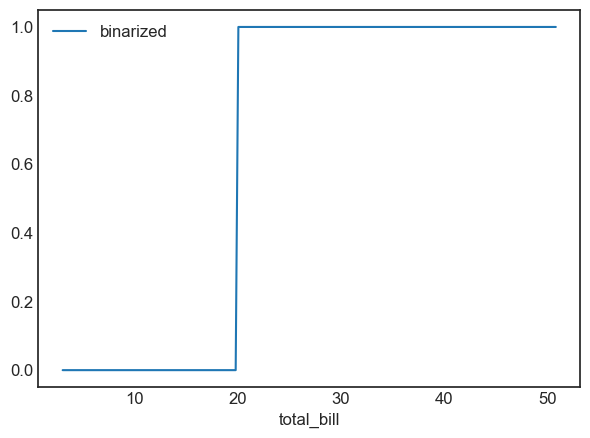

In [4]:
# check if works
# 
(
    pd.concat([tips.total_bill, pd.DataFrame(binarized, columns=['binarized'])], axis=1)
    .sort_values('total_bill')
    .plot(x='total_bill', y='binarized')
);

## Some transformer classes require fitting

* Transformation logic often requires some knowledge of the dataset before transforming.
    - z-score: z = (x-μ)/σ, where x is the raw score, μ is the population mean, and σ is the population standard deviation.
* These transformers must be *fit* to the data before use.
* Typical usage: fit transformer on a sample; use that fit transformer to transform future data.


|Property|Example|Description|
|---|---|---|
|Initialize with parameters| `stdscaler = StandardScaler()` | z-scale the data (no parameters) |
|Fit the transformer| `stdscaler.fit(data)` | compute the mean and std-dev of `data`|
|Transform data in a dataset | `feat = stdscaler.transform(newdata)` | z-scale `newdata` with mean/stdev of `data`|

In [5]:
from sklearn.preprocessing import StandardScaler

tips = sns.load_dataset('tips')
quantcols = ['total_bill', 'size', 'tip']
tips[quantcols].head()

,total_bill,size,tip
0,16.99,2,1.01
1,10.34,3,1.66
2,21.01,3,3.50
3,23.68,2,3.31
4,24.59,4,3.61


In [6]:
stdscaler = StandardScaler()

In [7]:
# This doesn't work!
stdscaler.transform(tips[quantcols])

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#stdscaler.mean_

In [8]:
stdscaler.fit(tips[quantcols])

StandardScaler()

In [9]:
stdscaler.mean_

array([19.78594262,  2.56967213,  2.99827869])

In [10]:
stdscaler.var_

array([78.92813149,  0.9008835 ,  1.90660851])

In [11]:
# z-scaled data
stdscaler.transform(tips[quantcols])

array([[-3.14711305e-01, -6.00192629e-01, -1.43994695e+00],
       [-1.06323531e+00,  4.53382921e-01, -9.69205340e-01],
       [ 1.37779900e-01,  4.53382921e-01,  3.63355539e-01],
       [ 4.38315103e-01, -6.00192629e-01,  2.25754144e-01],
       [ 5.40744704e-01,  1.50695847e+00,  4.43019505e-01],
       [ 6.19536705e-01,  1.50695847e+00,  1.23965916e+00],
       [-1.23995452e+00, -6.00192629e-01, -7.22971264e-01],
       [ 7.98507107e-01,  1.50695847e+00,  8.81527488e-02],
       [-5.34203307e-01, -6.00192629e-01, -7.51939979e-01],
       [-5.63468908e-01, -6.00192629e-01,  1.67816714e-01],
       [-1.07111451e+00, -6.00192629e-01, -9.32994446e-01],
       [ 1.74175992e+00,  1.50695847e+00,  1.44968234e+00],
       [-4.91430507e-01, -6.00192629e-01, -1.03438495e+00],
       [-1.52624903e-01,  1.50695847e+00,  1.24660453e-03],
       [-5.57840908e-01, -6.00192629e-01,  1.57309619e-02],
       [ 2.01939101e-01, -6.00192629e-01,  6.67527044e-01],
       [-1.06436091e+00,  4.53382921e-01

## Example: One-Hot Encoding

- `sklearn` provides a preprocessor to compute One-Hot encoding for categoricals
- last time, we code to do this by hand : (

In [12]:
# just categoricals
from sklearn.preprocessing import OneHotEncoder

tips_cat = ['sex', 'smoker', 'day', 'time']
regdata = tips[tips_cat]
regdata.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [13]:
ohe = OneHotEncoder()  # create
ohe.fit(regdata)       # fit to data
ohe.categories_        # you can look into created categories =

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [14]:
features = ohe.transform(regdata)  # why toarray()? to avoid sparse matrix!
features[:10]

<10x10 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [15]:
features.todense()

matrix([[1., 0., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 0., 1., 0.],
        [0., 1., 1., ..., 0., 1., 0.],
        ...,
        [0., 1., 0., ..., 0., 1., 0.],
        [0., 1., 1., ..., 0., 1., 0.],
        [1., 0., 1., ..., 1., 1., 0.]])

In [16]:
ohe.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Fri', 'x2_Sat',
       'x2_Sun', 'x2_Thur', 'x3_Dinner', 'x3_Lunch'], dtype=object)

In [17]:
ohe.inverse_transform(features[:10])

array([['Female', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Female', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner'],
       ['Male', 'No', 'Sun', 'Dinner']], dtype=object)

### Part 2

# Sklearn models

## Scikit-Learn Model Classes

`Sklearn` model classes (estimators) behave like transformers, but use outcomes (target variables, dependent variables that you train your model on) to fit and evaluate.

|Property|Example|Description|
|---|---|---|
|Initialize model parameters| `lr = LinearRegression()` | Create (empty) linear regression model|
|Fit the model to the data | `lr.fit(data, outcomes)` | Determines regression coefficients|
|Use model for prediction |`lr.predict(newdata)`| Use regression line make predictions|
|Evaluate the model| `lr.score(data, outcomes)` | Calculate the $R^2$ of the LR model|
|Access model attributes| `lr.coef_` | Access the regression coefficients|

*Note:* Once `fit`, estimators are just transformers (`predict` <-> `transform`)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(tips[['total_bill', 'size']], tips.tip)

LinearRegression()

In [20]:
# we can predict with it
lr.predict(tips[['total_bill', 'size']])[:10]

array([2.62933992, 2.20539403, 3.19464533, 3.24959215, 3.71915687,
       3.78405621, 1.86723629, 3.93147041, 2.44854892, 2.42444345])

In [21]:
# regression coefficients, why 2 slopes?
lr.coef_

array([0.09271334, 0.19259779])

In [22]:
lr.intercept_

0.6689447408125022

In [23]:
# RMSE
np.sqrt(np.mean((preds - tips.tip.values)**2))

NameError: name 'preds' is not defined

In [24]:
# R^2
lr.score(tips[['total_bill', 'size']], tips.tip)

0.46786930879612587

### Building models with transformers and estimators


<div class="image-txt-container">
    
1. Define your transformations; models.
1. Transform input data to features.
1. Use (transformed) features to fit model.
1. Predict outcomes from features using fit model.

<img src="imgs/image_0.png" width="50%"/>

</div>

In [25]:
features.toarray()[:10]

array([[1., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 0.]])

In [26]:
# multicollinearity
# which variables should be dropped?
ohe.get_feature_names()

array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes', 'x2_Fri', 'x2_Sat',
       'x2_Sun', 'x2_Thur', 'x3_Dinner', 'x3_Lunch'], dtype=object)

In [27]:
lr = LinearRegression()
lr.fit(features, tips.tip)

LinearRegression()

In [28]:
# higher dim. plane of best fit in 10 dim  (slopes)
lr.coef_

array([-0.08510444,  0.08510444, -0.04216238,  0.04216238, -0.20256076,
       -0.12962763,  0.13756057,  0.19462781,  0.25168453, -0.25168453])

In [29]:
preds = lr.predict(features)

In [30]:
preds[:10]

array([3.10415414, 3.27436302, 3.27436302, 3.27436302, 3.10415414,
       3.27436302, 3.27436302, 3.27436302, 3.27436302, 3.27436302])

In [31]:
# RMSE: terrible model! (why?)
np.sqrt(np.mean((preds - tips.tip.values)**2))

1.3616838466517012

In [32]:
# add predictions to original data
tips.assign(preds=preds)

,total_bill,tip,sex,smoker,day,time,size,preds
0,16.99,1.01,Female,No,Sun,Dinner,2,3.104154
1,10.34,1.66,Male,No,Sun,Dinner,3,3.274363
2,21.01,3.50,Male,No,Sun,Dinner,3,3.274363
3,23.68,3.31,Male,No,Sun,Dinner,2,3.274363
4,24.59,3.61,Female,No,Sun,Dinner,4,3.104154
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.007175
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2.921291
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.091500
242,17.82,1.75,Male,No,Sat,Dinner,2,3.007175


## Redundant Features

- For any categorical feature, can always leave out one of the categories (inferred from the rest).
- E.g., "Yes" and "No". Just have binary feature: "Yes".
- Done with `drop='first'` in `OneHotEncoder`.

In [33]:
ohe_better = OneHotEncoder(drop='first')
features = ohe_better.fit_transform(tips[tips_cat])

In [34]:
features.toarray()

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [1., 1., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [35]:
ohe_better.get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Sat', 'x2_Sun', 'x2_Thur', 'x3_Lunch'],
      dtype=object)

In [36]:
lr = LinearRegression()
lr.fit(features, tips.tip)

LinearRegression()

In [37]:
preds = lr.predict(features)

In [38]:
# doesn't affect RMSE, but makes the individual weights on features more stable
np.sqrt(np.mean((preds - tips.tip.values)**2))

1.361683846651701

### Part 3

# Pipelines

## The "entire model"

- The "entire" model is the combination of all preprocessing + estimation done to the raw data.
- `sklearn` allows you to combine your preprocessing + estimation into a single "pipeline" object.

## Putting it together: Scikit-Learn Pipelines

<div class="image-txt-container">

* Put together transformers and models using `sklearn.Pipeline`.
* Create a pipeline: `pl = Pipeline([feat_trans, mdl])`
* Fit *all* the transformer(s)/model(s) in the pipeline using `pl.fit(data, target)`
* Predict from *raw* input data through the pipeline using `pl.predict`.
* Note: a fit pipeline is also a transformer!

<img src="imgs/image_0.png" width="50%">



In [39]:
# pass a list of feature trans. and models, in sequence.
# does all fitting and transforming

from sklearn.pipeline import Pipeline

In [40]:
# pipelines are lists of steps: each is a transformation/estimator
# each transformation is a tuple: the 'name' for the step name, and the transformer/estimator object.
pl = Pipeline([
    ('one-hot', OneHotEncoder()),
    ('lin-reg', LinearRegression())
])

In [41]:
regdata.head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [42]:
pl.fit(regdata, tips.tip)

Pipeline(steps=[('one-hot', OneHotEncoder()), ('lin-reg', LinearRegression())])

In [43]:
# inspect the 'steps' of the pipeline using .named_steps
# gives a dictionary
# key: name you gave
# values: fit pipleline objects
pl.named_steps['one-hot'].transform(regdata).toarray()

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [44]:
pl.named_steps['one-hot'].categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object),
 array(['Dinner', 'Lunch'], dtype=object)]

In [45]:
pl.predict(regdata)[:10]

array([3.10415414, 3.27436302, 3.27436302, 3.27436302, 3.10415414,
       3.27436302, 3.27436302, 3.27436302, 3.27436302, 3.27436302])

In [46]:
# R^2 -- still terrible! (1 is good, 0 is bad)
pl.score(regdata, tips.tip)

0.02749679020147555

### (Realistic) Sklearn Pipelines
<div class="image-txt-container">
    
* `ColumnTransformer` was a recent addition (2018).
* Transforms using multiple transformers, each on different columns.
* `ColumnTransformer` performs the transformations and concatenates the output (axis=1).

<img src="imgs/image_3.png">

</div>

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing as pp

In [48]:
# 1. split data up into quant. and cat. features
# 2. z-scale for quant features
# 3. One-hot encode for cat. features
# 4. Two pipelines
# 5. Use column transformer to put everything back
# 6. Apply the model => predictions

In [49]:
tips.drop(['tip', 'total_bill', 'size'], axis=1).head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [50]:
# Numeric columns and associated transformers
num_feat = ['total_bill', 'size']
num_transformer = Pipeline(steps=[
    ('scaler', pp.StandardScaler())   # z-scale
])

# Categorical columns and associated transformers
cat_feat = ['sex', 'smoker', 'day', 'time']
cat_transformer = Pipeline(steps=[
    ('onehot', pp.OneHotEncoder())     # output from Ordinal becomes input to OneHot
])

# preprocessing pipeline (put them together)
preproc = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_feat),
        ('cat', cat_transformer, cat_feat)
    ])

pl = Pipeline(steps=[('preprocessor', preproc), ('regressor', LinearRegression())])

In [51]:
pl.fit(tips.drop('tip', axis=1), tips.tip)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['total_bill', 'size']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['sex', 'smoker', 'day',
                                                   'time'])])),
                ('regressor', LinearRegression())])

In [52]:
preds = pl.predict(tips.drop('tip', axis=1))
preds[:10]

array([2.73565486, 2.25086733, 3.25904369, 3.33533199, 3.80574011,
       3.83944008, 1.92653073, 3.98967441, 2.51896426, 2.49439764])

In [53]:
np.sqrt(np.mean((preds - tips.tip)**2))

1.0051634500049158

In [54]:
pl.score(tips.drop('tip', axis=1), tips.tip)

0.47007812322060794

In [55]:
pl.named_steps['preprocessor'].transform(tips.drop('tip', axis=1)).shape

(244, 12)

### Part 4

# Evaluating the fit model



<img src="imgs/image_4.png" width="100%">

## Evaluating the quality of a model

* Given a fit regressor on dataset, calculate e.g. the root-mean-square error.
* If the error is low, do you think it's a good model?
    - It fits the given *data* well, but is it a good model? (Is the sample representative?)
    - Will it give good predictions on similar, unknown, data?

## Fundamental Concepts of the quality of a 'fit model'

* **Bias**: the expected deviation between the predicted value and true value
* **Variance**: 
    - **Observation Variance**: the variability of the random noise in the process we are trying to model. 
    - **Estimated Model Variance**: the variability in the predicted value across different datasets. (Does the model generalize?)

### Model Quality: Bias and Variance

<div class="image-txt-container">
    
* The red bulls-eye: the true behavior of DGP
* Each dart: a specific function that models/predicts the DGP
* The model parameters $\theta$ select these functions.
* Credit: Scott Fortmann-Roe
    
<img src="imgs/image_5.png" width="100%">

</div>


## Evaluating the quality of a linear model

Given a dataset on which to fit the regression coefficients:
1. Calculate the RMSE to test for bias.
2. To test for variance, bootstrap estimate the regression coefficients:
    - sample the data.
    - For each sample, calculate the linear predictor.
    - For each input feature, calculate the CI for the distribution of predictions.
    - Large "prediction intervals" imply the model is susceptible to noise (e.g. outliers)
    
Still, this relies on a "representative sample" for generalization to new data!

In [ ]:
sns.lmplot(data=tips, x='total_bill', y='tip');

## Evaluating the quality of a (general) model

* Given a fit (non-linear) model, there are three possibilities for quality:
    - The model doesn't fit the given data well (high bias; underfit)
    - Does it reflect the process of interest? (good fit; robust)
    - Does it just fit the data (noise and all)? (high variance; overfit)

* How can we ascertain the quality on similar, out-of-sample data?

## Evaluating the quality of a (general) model

* Given a quadratic process, a linear model has high bias.
* "Connecting-the-dots" will fail to generalize (high variance).
* Balance model complexity with complexity of DGP.

![overfit](imgs/under-over-fit.png)

### Example: predicting survival on the Titanic with Decision Trees

<div class="image-txt-container">

* Did a given passenger survive the Titanic distaster?
* The (simple) tree below has mediocre accuracy

<img src="imgs/image_6.png" width="50%">

</div>

### Reducing Bias with more complicated models

* Improve performance by "growing" the decision tree model.
* Decrease the number of passengers required in leaf nodes.
* Effect: "Learn" individual passengers?
* How do the know your model generalizes?

<img src="imgs/Titanic_Decision_Tree.png" width="100%">


## Train-Test Split

To assess your model for overfitting to the data, randomly split the data into a "training set" and a "test set".

<div class="image-txt-container">

* The training set is used to fit the model (train the predictor).
* The test set is used to test the goodness-of-fit of the fit model.
* *similar* to bootstrap estimating a regression model.

<img src="imgs/train-test.png">

</div>



## The machine learning training pipeline:

<img src="imgs/train-test.png" width="50%">

Scikit-Learn has functions that help us do this.

### Using Scikit-Learn for train-test split

* Splitting a dataset using `sklearn.model_selection.train_test_split` 
* Given features `X` and a target array `y`,
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
```
randomly splits the features and target into training and test sets.

In [ ]:
from sklearn.model_selection import train_test_split

X = tips.drop('tip', axis=1)
y = tips.tip
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
print(
    len(X_train)/len(X),
    len(X_test)/len(X)
)

### Example Prediction Pipeline

* Train a simple linear regression model on the tips data
* Split the data into a training and test set:
    - fit the model on the training set
    - compute the error on the test set

In [ ]:
X = tips.drop(['tip', 'sex', 'smoker', 'day', 'time' ], axis=1)
y = tips.tip

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


pl = Pipeline([
   ('lin-reg', LinearRegression())
])

pl.fit(X_train, y_train)

# performance on training data
pred_train = pl.predict(X_train)
rmse_train = np.sqrt(np.mean((pred_train - y_train)**2))

# performance on test data -- what we really care about
pred_test = pl.predict(X_test)
rmse_test = np.sqrt(np.mean((pred_test - y_test)**2))

print ("train RMSE: %s" % rmse_train)
print ("test RMSE: %s" % rmse_test)

### Conclusion: evaluating model fit

* Complex models are required to model complex phenomena.
* How can you tell a complex model isn't over-fitting to the data?
    - Answer: split into a training set and a test set.
- If test performance is << train performance, you've overfit